In [85]:
import numpy as np

MIN_ROOT = -5
MAX_ROOT = 5

def make(n_samples, n_degree):
    global MIN_ROOT, MAX_ROOT
    y = np.random.uniform(MIN_ROOT, MAX_ROOT, (n_samples, n_degree))
    y.sort(axis=1)
    X = np.array([np.poly(_) for _ in y])
    return X, y

# toy case
X, y = make(1, 2)
print(X)
print(y)




[[ 1.         -5.21713927  5.22267596]]
[[1.35080989 3.86632938]]


In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop
print("hello")

hello


In [87]:
N_SAMPLES = 105472
DEGREE = 2
X_train, y_train = make(int(N_SAMPLES*0.8), DEGREE)
X_test, y_test = make(int(N_SAMPLES*0.2), DEGREE)
Y_train=y_train[:,0:1]
Y_test=y_test[:,0:1]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train)
print(Y_train)



(84377, 3) (84377, 1)
(21094, 3) (21094, 1)
[[ 1.         -8.07908246 16.2803105 ]
 [ 1.          1.57018688 -0.6821452 ]
 [ 1.         -8.40630948 17.40724599]
 ...
 [ 1.         -3.03635936 -5.39677315]
 [ 1.          7.55334829 13.52998432]
 [ 1.         -4.30078059  4.46723686]]
[[ 3.84567825]
 [-1.9246183 ]
 [ 3.69397523]
 ...
 [-1.25700368]
 [-4.63299377]
 [ 1.75423179]]


In [88]:
model = Sequential()
model.add(Dense(3, input_dim=3,kernel_initializer='normal', activation='linear'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))
# o=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 4         
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [89]:
opt = RMSprop(lr=0.001, rho=0.9)
model.compile(loss='mean_absolute_error',
              optimizer='RMSprop',
              metrics=['mae'])

In [90]:
BATCH_SIZE = 32
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=500,
          verbose=1,
          validation_data=(X_test,Y_test))


Train on 84377 samples, validate on 21094 samples
Epoch 1/500
84377/84377 [==============================] - 3s 32us/step - loss: 0.6097 - mae: 0.6097 - val_loss: 0.4044 - val_mae: 0.4044
Epoch 2/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.3289 - mae: 0.3289 - val_loss: 0.2265 - val_mae: 0.2265
Epoch 3/500
84377/84377 [==============================] - 3s 31us/step - loss: 0.1842 - mae: 0.1842 - val_loss: 0.1547 - val_mae: 0.1547
Epoch 4/500
84377/84377 [==============================] - 3s 31us/step - loss: 0.1492 - mae: 0.1492 - val_loss: 0.1326 - val_mae: 0.1326
Epoch 5/500
84377/84377 [==============================] - 3s 33us/step - loss: 0.1351 - mae: 0.1351 - val_loss: 0.1322 - val_mae: 0.1322
Epoch 6/500
84377/84377 [==============================] - 3s 34us/step - loss: 0.1286 - mae: 0.1286 - val_loss: 0.1220 - val_mae: 0.1220
Epoch 7/500
84377/84377 [==============================] - 3s 32us/step - loss: 0.1247 - mae: 0.1247 - val_loss: 0.1184 - 

Epoch 118/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1061 - mae: 0.1061 - val_loss: 0.1042 - val_mae: 0.1042
Epoch 119/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1059 - mae: 0.1059 - val_loss: 0.1062 - val_mae: 0.1062
Epoch 120/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1055 - mae: 0.1055 - val_loss: 0.1017 - val_mae: 0.1017
Epoch 121/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1059 - mae: 0.1059 - val_loss: 0.1241 - val_mae: 0.1241
Epoch 122/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1059 - mae: 0.1059 - val_loss: 0.1162 - val_mae: 0.1162
Epoch 123/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1058 - mae: 0.1058 - val_loss: 0.1001 - val_mae: 0.1001
Epoch 124/500
84377/84377 [==============================] - 3s 32us/step - loss: 0.1059 - mae: 0.1059 - val_loss: 0.1020 - val_mae: 0.1020
Epoch 125/500
84377/

84377/84377 [==============================] - 3s 30us/step - loss: 0.1053 - mae: 0.1053 - val_loss: 0.1076 - val_mae: 0.1076
Epoch 235/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1053 - mae: 0.1053 - val_loss: 0.1137 - val_mae: 0.1137
Epoch 236/500
84377/84377 [==============================] - 3s 31us/step - loss: 0.1053 - mae: 0.1053 - val_loss: 0.1003 - val_mae: 0.1003
Epoch 237/500
84377/84377 [==============================] - 3s 31us/step - loss: 0.1054 - mae: 0.1054 - val_loss: 0.1016 - val_mae: 0.1016
Epoch 238/500
84377/84377 [==============================] - 3s 31us/step - loss: 0.1053 - mae: 0.1053 - val_loss: 0.1147 - val_mae: 0.1147
Epoch 239/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1054 - mae: 0.1054 - val_loss: 0.1001 - val_mae: 0.1001
Epoch 240/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1054 - mae: 0.1054 - val_loss: 0.1084 - val_mae: 0.1084
Epoch 241/500
84377/84377 [=======

84377/84377 [==============================] - 3s 31us/step - loss: 0.1050 - mae: 0.1050 - val_loss: 0.1087 - val_mae: 0.1087
Epoch 351/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1048 - mae: 0.1048 - val_loss: 0.1040 - val_mae: 0.1040
Epoch 352/500
84377/84377 [==============================] - 2s 29us/step - loss: 0.1048 - mae: 0.1048 - val_loss: 0.1263 - val_mae: 0.1263
Epoch 353/500
84377/84377 [==============================] - 3s 32us/step - loss: 0.1050 - mae: 0.1050 - val_loss: 0.1175 - val_mae: 0.1175
Epoch 354/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1050 - mae: 0.1050 - val_loss: 0.1185 - val_mae: 0.1185
Epoch 355/500
84377/84377 [==============================] - 2s 29us/step - loss: 0.1049 - mae: 0.1049 - val_loss: 0.1020 - val_mae: 0.1020
Epoch 356/500
84377/84377 [==============================] - 3s 30us/step - loss: 0.1050 - mae: 0.1050 - val_loss: 0.1041 - val_mae: 0.1041
Epoch 357/500
84377/84377 [=======

84377/84377 [==============================] - 3s 34us/step - loss: 0.1047 - mae: 0.1047 - val_loss: 0.1035 - val_mae: 0.1035
Epoch 467/500
84377/84377 [==============================] - 3s 33us/step - loss: 0.1047 - mae: 0.1047 - val_loss: 0.1094 - val_mae: 0.1094
Epoch 468/500
84377/84377 [==============================] - 3s 34us/step - loss: 0.1046 - mae: 0.1046 - val_loss: 0.1006 - val_mae: 0.1006
Epoch 469/500
84377/84377 [==============================] - 3s 34us/step - loss: 0.1046 - mae: 0.1046 - val_loss: 0.1165 - val_mae: 0.1165
Epoch 470/500
84377/84377 [==============================] - 3s 37us/step - loss: 0.1048 - mae: 0.1048 - val_loss: 0.1070 - val_mae: 0.1070
Epoch 471/500
84377/84377 [==============================] - 4s 45us/step - loss: 0.1047 - mae: 0.1047 - val_loss: 0.1045 - val_mae: 0.1045
Epoch 472/500
84377/84377 [==============================] - 3s 33us/step - loss: 0.1047 - mae: 0.1047 - val_loss: 0.1045 - val_mae: 0.1045
Epoch 473/500
84377/84377 [=======

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


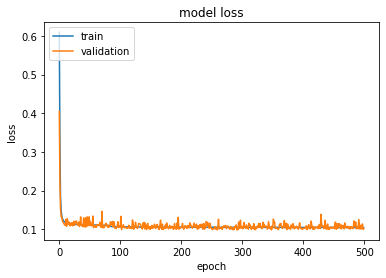

In [91]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [92]:
Xnew = np.array([[1, -0.66, 0.1]])
ynew= model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))


X=[ 1.   -0.66  0.1 ], Predicted=[0.03957033]


In [102]:
Xnew = np.array([[1, -4.2, 1.3]])
ynew= model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))


X=[ 1.  -4.2  1.3], Predicted=[0.3916812]


In [110]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


In [114]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.101, Test: 0.102


In [118]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

21094/21094 [==============================] - 0s 11us/step
Train: 0.101, Test: 0.102
